In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
#lats_lngs into a list
coordinates = list(lat_lngs)

In [4]:
import citipy as citipy

In [5]:
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kodiak us
upernavik gl
ikalamavony mg
atuona pf
phan rang vn
busselton au
sitka us
saleaula ws
besancon fr
sitka us
souillac mu
ribeira grande pt
santa isabel do rio negro br
san patricio mx
leshukonskoye ru
upernavik gl
saskylakh ru
barrow us
kassala sd
raudeberg no
chulman ru
kuala terengganu my
mar del plata ar
belize bz
luena ao
cidreira br
kavali in
bethel us
port alfred za
severo-kurilsk ru
palabuhanratu id
tasiilaq gl
hermanus za
okato nz
bay roberts ca
punta arenas cl
vozhega ru
mar del plata ar
druzhba ua
taolanaro mg
sampit id
sinnamary gf
souillac mu
ushuaia ar
bluff nz
jamestown sh
rikitea pf
san vicente ph
cape town za
barentsburg sj
chuy uy
barrow us
mataura pf
albany au
iqaluit ca
myitkyina mm
pangody ru
mys shmidta ru
malwan in
bonavista ca
rawson ar
sarhari pk
jadu ly
santa luzia br
saskylakh ru
nhulunbuy au
georgetown sh
gushikawa jp
litovko ru
severodvinsk ru
ushuaia ar
vaini to
cherskiy ru
yekaterinovka ru
neyshabur ir
kapaa us
kamaishi jp
hithadhoo mv
alvorada br
h

oriental mx
eldorado mx
codrington ag
antofagasta cl
makakilo city us
miri my
illoqqortoormiut gl
kuruman za
cape town za
atuona pf
kolpashevo ru
aksarka ru
selma us
arraial do cabo br
te anau nz
thompson ca
nikolskoye ru
shelburne ca
moerai pf
chiredzi zw
vianopolis br
naryan-mar ru
boguchany ru
gazimurskiy zavod ru
touros br
kamaishi jp
martinez us
belushya guba ru
port macquarie au
avarua ck
saint-philippe re
castro cl
haines junction ca
saint-philippe re
churapcha ru
mahebourg mu
atuona pf
morant bay jm
hastings nz
taoudenni ml
sioux lookout ca
amapa br
chuy uy
saint-philippe re
nouadhibou mr
mataura pf
carnarvon au
new norfolk au
hamilton bm
clyde river ca
tuktoyaktuk ca
port alfred za
saleaula ws
fatikchhari bd
arraial do cabo br
sitka us
san cristobal ec
portland au
port hedland au
guilin cn
castletown gb
coahuayana mx
salekhard ru
mataura pf
kota in
bolungarvik is
saint-philippe re
betioky mg
kazachinskoye ru
victoria sc
rikitea pf
rikitea pf
rikitea pf
faanui pf
rikitea pf
tum

asosa et
mancio lima br
illoqqortoormiut gl
punta arenas cl
lebu cl
cidreira br
illoqqortoormiut gl
bredasdorp za
mataura pf
lorengau pg
plettenberg bay za
qaanaaq gl
sao joao da barra br
sijunjung id
sistranda no
kichmengskiy gorodok ru
banjar id
goundi td
busselton au
tautira pf
bar harbor us
auki sb
broome au
saleaula ws
yellowknife ca
east london za
tecoanapa mx
bluff nz
khatanga ru
santa isabel do rio negro br
nikolskoye ru
glencoe za
gillette us
touros br
green valley us
labuhan id
thompson ca
college us
yurimaguas pe
grand centre ca
arraial do cabo br
cockburn town tc
hermanus za
dikson ru
port hedland au
namatanai pg
coxim br
ushuaia ar
punta arenas cl
ribeira grande pt
mataura pf
pau brasil br
boende cd
nizhneyansk ru
saint-pierre pm
longyearbyen sj
ushuaia ar
cidreira br
kieta pg
bredasdorp za
atuona pf
hithadhoo mv
ribeira grande pt
rikitea pf
bluff nz
punta arenas cl
kodiak us
los llanos de aridane es
alyangula au
punta arenas cl
butaritari ki
warrington us
mataura pf
ahipa

In [7]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)


638

In [8]:
import requests
requests.__version__

'2.25.1'

In [9]:
import requests
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e5f90c4d5099b220d1a55d65c20c0be


In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Create counters.
record_count = 1
set_count = 1

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | ikalamavony
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | phan rang
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | saleaula
City not found. Skipping...
Processing Record 9 of Set 1 | besancon
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | santa isabel do rio negro
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | leshukonskoye
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | kassala
Processing Record 18 of Set 1 | raudeberg
Processing Record 19 of Set 1 | chulman
Processing Record 20 of Set 1 | kuala terengganu
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | belize
Processing 

Processing Record 40 of Set 4 | carnarvon
Processing Record 41 of Set 4 | seversk
Processing Record 42 of Set 4 | ahipara
Processing Record 43 of Set 4 | tahe
Processing Record 44 of Set 4 | bambanglipuro
Processing Record 45 of Set 4 | karoi
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | castro
Processing Record 48 of Set 4 | corn island
Processing Record 49 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 50 of Set 4 | port elizabeth
Processing Record 1 of Set 5 | alaca
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | thai nguyen
Processing Record 4 of Set 5 | chamrajnagar
Processing Record 5 of Set 5 | charlestown
Processing Record 6 of Set 5 | casas grandes
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | preobrazheniye
Processing Record 9 of Set 5 | great yarmouth
Processing Record 10 of Set 5 | bac lieu
Processing Record 11 of Set 5 | awjilah
Processin

Processing Record 31 of Set 8 | eldorado
Processing Record 32 of Set 8 | codrington
Processing Record 33 of Set 8 | antofagasta
Processing Record 34 of Set 8 | miri
Processing Record 35 of Set 8 | kuruman
Processing Record 36 of Set 8 | kolpashevo
Processing Record 37 of Set 8 | aksarka
Processing Record 38 of Set 8 | selma
Processing Record 39 of Set 8 | te anau
Processing Record 40 of Set 8 | shelburne
Processing Record 41 of Set 8 | moerai
Processing Record 42 of Set 8 | chiredzi
Processing Record 43 of Set 8 | vianopolis
Processing Record 44 of Set 8 | naryan-mar
Processing Record 45 of Set 8 | boguchany
Processing Record 46 of Set 8 | gazimurskiy zavod
Processing Record 47 of Set 8 | touros
Processing Record 48 of Set 8 | martinez
Processing Record 49 of Set 8 | port macquarie
Processing Record 50 of Set 8 | haines junction
Processing Record 1 of Set 9 | morant bay
Processing Record 2 of Set 9 | hastings
Processing Record 3 of Set 9 | taoudenni
Processing Record 4 of Set 9 | sioux

Processing Record 18 of Set 12 | aksu
Processing Record 19 of Set 12 | paraiba do sul
Processing Record 20 of Set 12 | mount isa
Processing Record 21 of Set 12 | agirish
Processing Record 22 of Set 12 | havre
Processing Record 23 of Set 12 | la rioja
Processing Record 24 of Set 12 | lulea
Processing Record 25 of Set 12 | limbang
Processing Record 26 of Set 12 | gizo
Processing Record 27 of Set 12 | kismayo
Processing Record 28 of Set 12 | sabang
Processing Record 29 of Set 12 | sulphur springs
Processing Record 30 of Set 12 | apold
Processing Record 31 of Set 12 | dzhebariki-khaya
Processing Record 32 of Set 12 | ginir
Processing Record 33 of Set 12 | goianesia
Processing Record 34 of Set 12 | maple creek
Processing Record 35 of Set 12 | urucui
Processing Record 36 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 37 of Set 12 | nishihara
Processing Record 38 of Set 12 | lata
Processing Record 39 of Set 12 | camana
Processing Record 40 of Set 12 | vicuna
Processing Rec

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,42.31,87,90,8.05,US,2021-10-20 18:51:36
1,Upernavik,72.7868,-56.1549,33.17,99,100,13.91,GL,2021-10-20 18:51:15
2,Ikalamavony,-21.1500,46.5833,68.77,79,89,4.45,MG,2021-10-20 18:55:01
3,Atuona,-9.8000,-139.0333,77.22,80,49,13.96,PF,2021-10-20 18:51:04
4,Busselton,-33.6500,115.3333,51.04,79,96,14.65,AU,2021-10-20 18:50:51
...,...,...,...,...,...,...,...,...,...
582,Novopskov,49.5464,39.0899,39.79,44,65,8.03,UA,2021-10-20 18:52:56
583,Sao Felix Do Xingu,-6.6447,-51.9950,86.40,58,78,0.81,BR,2021-10-20 18:54:09
584,Cap-Aux-Meules,47.3821,-61.8597,53.65,82,75,17.27,CA,2021-10-20 18:57:01
585,Villanueva De Cordoba,38.3228,-4.6287,65.93,52,29,1.97,ES,2021-10-20 18:58:34


In [14]:
upd_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[upd_columns]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2021-10-20 18:51:36,57.7900,-152.4072,42.31,87,90,8.05
1,Upernavik,GL,2021-10-20 18:51:15,72.7868,-56.1549,33.17,99,100,13.91
2,Ikalamavony,MG,2021-10-20 18:55:01,-21.1500,46.5833,68.77,79,89,4.45
3,Atuona,PF,2021-10-20 18:51:04,-9.8000,-139.0333,77.22,80,49,13.96
4,Busselton,AU,2021-10-20 18:50:51,-33.6500,115.3333,51.04,79,96,14.65
...,...,...,...,...,...,...,...,...,...
582,Novopskov,UA,2021-10-20 18:52:56,49.5464,39.0899,39.79,44,65,8.03
583,Sao Felix Do Xingu,BR,2021-10-20 18:54:09,-6.6447,-51.9950,86.40,58,78,0.81
584,Cap-Aux-Meules,CA,2021-10-20 18:57:01,47.3821,-61.8597,53.65,82,75,17.27
585,Villanueva De Cordoba,ES,2021-10-20 18:58:34,38.3228,-4.6287,65.93,52,29,1.97


In [15]:
output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
lats=city_data_df["Lat"]
max_temp=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

In [17]:
import time
today = time.strftime("%x")
today

'10/20/21'

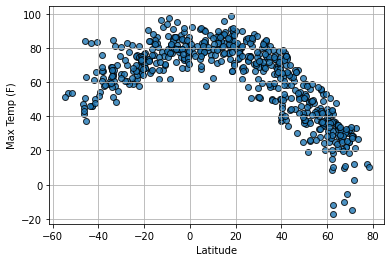

In [18]:
plt.scatter(lats,max_temp,edgecolor="black",marker="o",label="cities", alpha=0.8, linewidths=1)
#plt.title("City Latitude vs. Max Temperature ")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

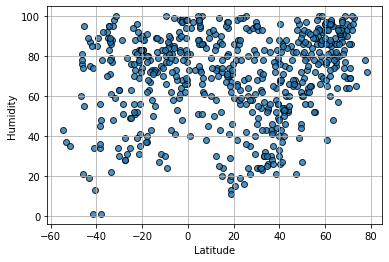

In [19]:
plt.scatter(lats,humidity,edgecolor="black",marker="o",label="cities", alpha=0.8, linewidths=1)
#plt.title("City Latitude vs. Humidity ")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

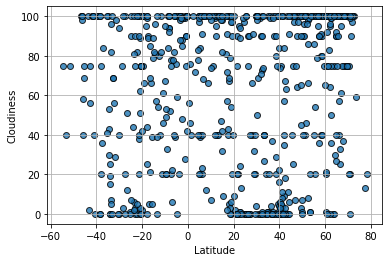

In [20]:
plt.scatter(lats,cloudiness,edgecolor="black",marker="o",label="cities", alpha=0.8, linewidths=1)
#plt.title("City Latitude vs. Cloudiness ")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

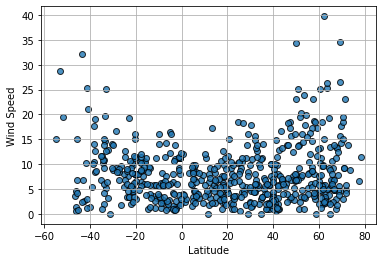

In [21]:
plt.scatter(lats,wind_speed,edgecolor="black",marker="o",label="cities", alpha=0.8, linewidths=1)
#plt.title("City Latitude vs. Wind Speed ")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [22]:
from scipy.stats import linregress

In [23]:
linregress(lats,wind_speed)

LinregressResult(slope=0.0076785815554240265, intercept=7.661319076934018, rvalue=0.045377341395726675, pvalue=0.27236696578652064, stderr=0.006989022381731396, intercept_stderr=0.2728171467338242)

In [24]:
(slope, intercept, r_value, p_value, std_err)=linregress(lats,wind_speed)


In [25]:
line_eq = "y =" +str(round(slope,2))+"x + "+str(round(intercept,2))
print(line_eq)
print(f"The p_value is: {p_value:.3f}")

y =0.01x + 7.66
The p_value is: 0.272


In [26]:
regress_values = [(lats * slope + intercept) for lat in lats]

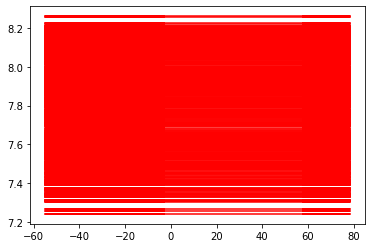

In [27]:
plt.plot(lats, regress_values, "r")
plt.show()

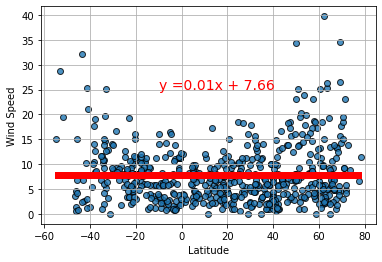

In [28]:
plt.scatter(lats,wind_speed,edgecolor="black",marker="o",label="cities", alpha=0.8, linewidths=1)
plt.plot(lats, regress_values, "r")
#plt.title("City Latitude vs. Wind Speed ")
plt.annotate(line_eq, (-10,25), fontsize=14, color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

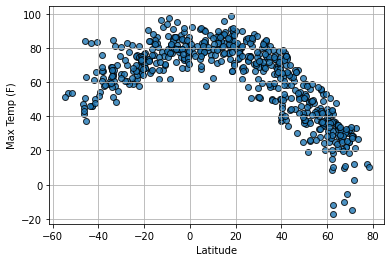

In [29]:
plt.scatter(lats,max_temp,edgecolor="black",marker="o",label="cities", alpha=0.8, linewidths=1)
#plt.title("City Latitude vs. Max Temperature ")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [30]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats,max_temp)
regress_values = (slope * lats + intercept)
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


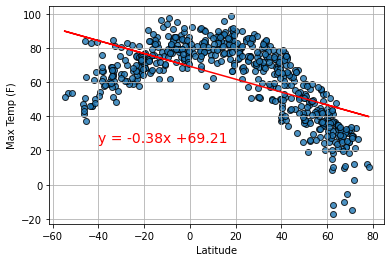

In [31]:
plt.scatter(lats, max_temp,edgecolor="black",marker="o",label="cities", alpha=0.8, linewidths=1 )
plt.plot(lats, regress_values, "r")
plt.annotate(line_eq2, (-40,25), fontsize=14, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)
plt.show()

In [32]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq3, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [34]:
index13 = city_data_df.loc[13]
index13

City                       Barrow
Country                        US
Date          2021-10-20 18:51:05
Lat                       71.2906
Lng                     -156.7887
Max Temp                    28.42
Humidity                       86
Cloudiness                     90
Wind Speed                  23.02
Name: 13, dtype: object

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2021-10-20 18:51:36,57.7900,-152.4072,42.31,87,90,8.05
1,Upernavik,GL,2021-10-20 18:51:15,72.7868,-56.1549,33.17,99,100,13.91
5,Sitka,US,2021-10-20 18:55:02,57.0531,-135.3300,44.80,90,100,9.40
6,Besancon,FR,2021-10-20 18:55:03,47.2488,6.0182,67.37,21,100,18.54
8,Ribeira Grande,PT,2021-10-20 18:52:03,38.5167,-28.7000,72.00,64,20,5.75


In [37]:
northern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


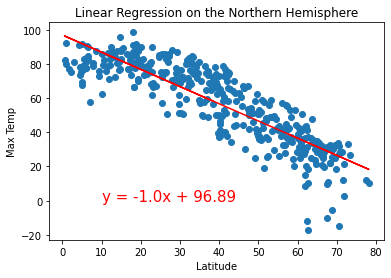

In [40]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere", "Max Temp", (10,0))

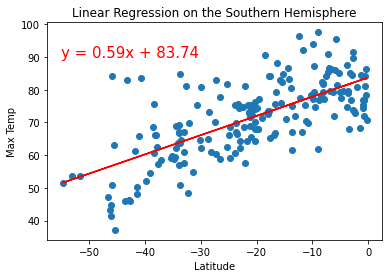

In [45]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere", "Max Temp", (-55,90))

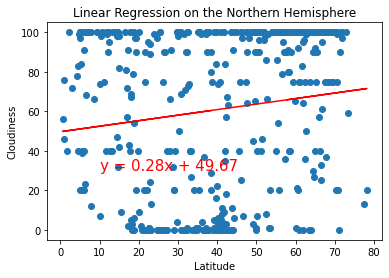

In [47]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere", "Cloudiness", (10,30))

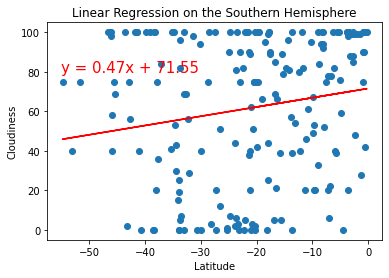

In [49]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere", "Cloudiness", (-55,80))